<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.931520,91.927212,67.880233,39.321037,0.000807,308.060809,308.059822,0.000988
1,0.0,1.0,33.472435,66.728744,65.319569,23.329431,0.000330,198.850508,198.850007,0.000502
2,0.0,2.0,70.198132,80.267632,51.442311,80.401572,-0.000663,292.308983,292.309520,-0.000537
3,0.0,3.0,56.048435,39.848154,37.540756,81.316742,-0.002017,224.752070,224.753997,-0.001928
4,0.0,4.0,72.063772,65.461167,23.739015,59.062963,-0.001433,230.325485,230.326702,-0.001216
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,99.429982,25.131061,68.950879,23.544499,-0.002527,227.053894,227.059519,-0.005625
59996,999.0,56.0,75.963900,64.329427,92.470329,65.209517,0.000093,307.973266,307.974070,-0.000804
59997,999.0,57.0,61.577858,94.816356,73.958219,38.566956,-0.000266,278.919124,278.918928,0.000196
59998,999.0,58.0,49.757933,89.544879,95.353596,56.029493,-0.000115,300.685785,300.685050,0.000735


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  0.000807  308.060809   
      1.0    33.472435  66.728744  65.319569  23.329431  0.000330  198.850508   
      2.0    70.198132  80.267632  51.442311  80.401572 -0.000663  292.308983   
      3.0    56.048435  39.848154  37.540756  81.316742 -0.002017  224.752070   
      4.0    72.063772  65.461167  23.739015  59.062963 -0.001433  230.325485   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -0.002527  227.053894   
      56.0   75.963900  64.329427  92.470329  65.209517  0.000093  307.973266   
      57.0   61.577858  94.816356  73.958219  38.566956 -0.000266  278.919124   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.000115  300.685785   
      59.0   60.755958  32.632816  61.278316  20.710460  0.006184  185.383734   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    308.059822  0.000988  
      1.0    198.850007  0.000502  
      2.0    292.309520 -0.000537  
      3.0    224.753997 -0.001928  
      4.0    230.326702 -0.001216  
...                 ...       ...  
999.0 55.0   227.059519 -0.005625  
      56.0   307.974070 -0.000804  
      57.0   278.918928  0.000196  
      58.0   300.685050  0.000735  
      59.0   185.379184  0.004550  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  0.000807  308.060809   
      1.0    33.472435  66.728744  65.319569  23.329431  0.000330  198.850508   
      2.0    70.198132  80.267632  51.442311  80.401572 -0.000663  292.308983   
      3.0    56.048435  39.848154  37.540756  81.316742 -0.002017  224.752070   
      4.0    72.063772  65.461167  23.739015  59.062963 -0.001433  230.325485   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -0.002527  227.053894   
      56.0   75.963900  64.329427  92.470329  65.209517  0.000093  307.973266   
      57.0   61.577858  94.816356  73.958219  38.566956 -0.000266  278.919124   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.000115  300.685785   
      59.0   60.755958  32.632816  61.278316  20.710460  0.006184  185.383734   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    308.059822  0.000988  
      1.0    198.850007  0.000502  
      2.0    292.309520 -0.000537  
      3.0    224.753997 -0.001928  
      4.0    230.326702 -0.001216  
...                 ...       ...  
999.0 55.0   227.059519 -0.005625  
      56.0   307.974070 -0.000804  
      57.0   278.918928  0.000196  
      58.0   300.685050  0.000735  
      59.0   185.379184  0.004550  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.931520,91.927212,67.880233,39.321037,0.000807,308.060809,308.059822,0.000988
1,0.0,1.0,33.472435,66.728744,65.319569,23.329431,0.000330,198.850508,198.850007,0.000502
2,0.0,2.0,70.198132,80.267632,51.442311,80.401572,-0.000663,292.308983,292.309520,-0.000537
3,0.0,3.0,56.048435,39.848154,37.540756,81.316742,-0.002017,224.752070,224.753997,-0.001928
4,0.0,4.0,72.063772,65.461167,23.739015,59.062963,-0.001433,230.325485,230.326702,-0.001216
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,99.429982,25.131061,68.950879,23.544499,-0.002527,227.053894,227.059519,-0.005625
59996,999.0,56.0,75.963900,64.329427,92.470329,65.209517,0.000093,307.973266,307.974070,-0.000804
59997,999.0,57.0,61.577858,94.816356,73.958219,38.566956,-0.000266,278.919124,278.918928,0.000196
59998,999.0,58.0,49.757933,89.544879,95.353596,56.029493,-0.000115,300.685785,300.685050,0.000735


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  0.000807  308.060809   
      1.0    33.472435  66.728744  65.319569  23.329431  0.000330  198.850508   
      2.0    70.198132  80.267632  51.442311  80.401572 -0.000663  292.308983   
      3.0    56.048435  39.848154  37.540756  81.316742 -0.002017  224.752070   
      4.0    72.063772  65.461167  23.739015  59.062963 -0.001433  230.325485   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -0.002527  227.053894   
      56.0   75.963900  64.329427  92.470329  65.209517  0.000093  307.973266   
      57.0   61.577858  94.816356  73.958219  38.566956 -0.000266  278.919124   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.000115  300.685785   
      59.0   60.755958  32.632816  61.278316  20.710460  0.006184  185.383734   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    308.059822  0.000988  
      1.0    198.850007  0.000502  
      2.0    292.309520 -0.000537  
      3.0    224.753997 -0.001928  
      4.0    230.326702 -0.001216  
...                 ...       ...  
999.0 55.0   227.059519 -0.005625  
      56.0   307.974070 -0.000804  
      57.0   278.918928  0.000196  
      58.0   300.685050  0.000735  
      59.0   185.379184  0.004550  

[60000 rows x 8 columns]

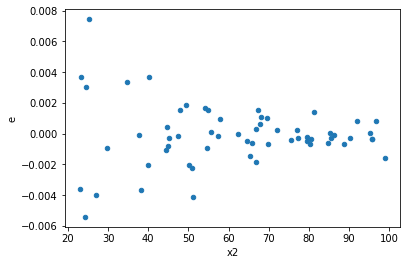

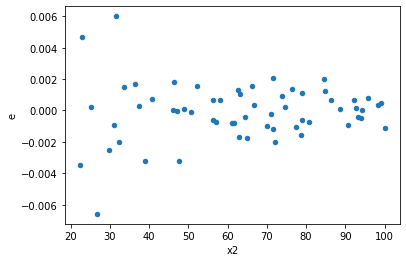

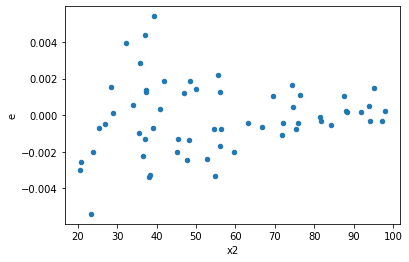

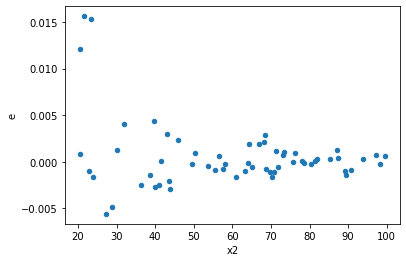

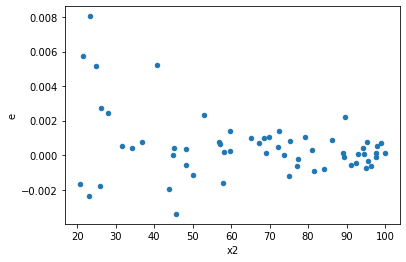

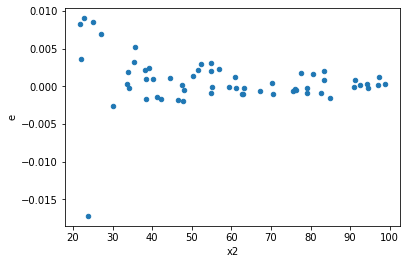

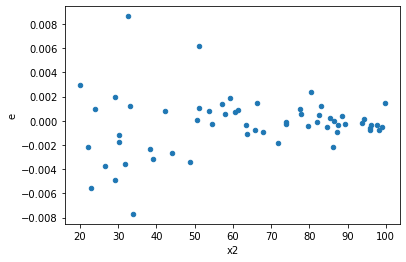

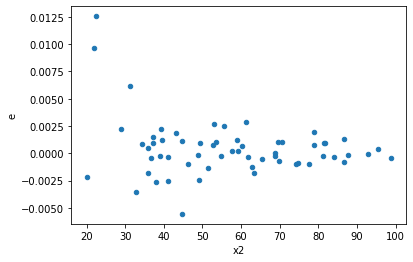

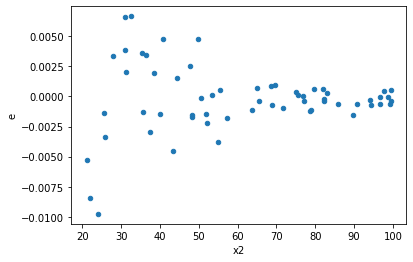

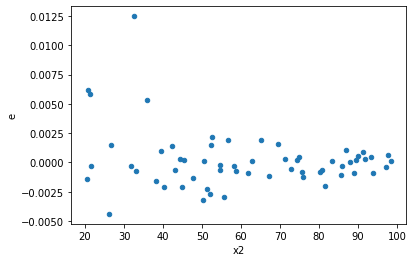

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)


    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,31.0,4.8753450864274774e-05,0.0001768795783950295,2.3215928982987987e-06,5.705792851452565e-06,2.4577060240120554,0.022529399136486994,0.9887353004317565,0.011264699568243497,Reject001=1 : Homoscedasticity
2.0,26.0,26.0,9.488614362982784e-05,9.959964361126057e-05,3.649467062685686e-06,3.830755523510022e-06,1.0496753245639443,0.9025710753077751,0.5487144623461124,0.45128553765388757,Reject001=1 : Homoscedasticity
3.0,14.0,38.0,4.760654291546518e-05,0.0005757503311092137,3.4004673511046557e-06,1.5151324502874044e-05,4.455659454560584,0.00023874870901563483,0.9998806256454922,0.00011937435450781742,Reject001=0 : Heteroscedasticity
4.0,29.0,23.0,2.962336278539994e-05,0.00013609757003182297,1.021495268462067e-06,5.91728565355752e-06,5.7927685386799785,5.4408646057657606e-05,0.9999727956769712,2.7204323028828803e-05,Reject001=0 : Heteroscedasticity
5.0,19.0,33.0,8.036191305237714e-05,0.000515025734706555,4.229574371177744e-06,1.5606840445653182e-05,3.6899316753963083,0.0010041480067226605,0.9994979259966387,0.0005020740033613302,Reject001=0 : Heteroscedasticity
6.0,30.0,22.0,5.566818731931817e-05,0.0002287792824111918,1.8556062439772723e-06,1.0399058291417808e-05,5.604129822892091,9.32688885353361e-05,0.9999533655557323,4.663444426766805e-05,Reject001=0 : Heteroscedasticity
7.0,28.0,24.0,4.622566061953282e-05,0.00024678771638158464,1.6509164506976006e-06,1.028282151589936e-05,6.2285535476700336,2.2079471660774175e-05,0.9999889602641696,1.1039735830387087e-05,Reject001=0 : Heteroscedasticity
9.0,23.0,29.0,1.747007399766344e-05,0.0002943039436724418,7.595684346810191e-07,1.0148411850773854e-05,13.360760383671922,1.1905831875935746e-09,0.9999999994047084,5.952915937967873e-10,Reject001=0 : Heteroscedasticity
10.0,24.0,28.0,2.616939512228156e-05,0.00010844971359379066,1.0903914634283984e-06,3.873204056921095e-06,3.5521225053826115,0.001625623027167622,0.9991871884864162,0.000812811513583811,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,31.0,4.8753450864274774e-05,0.0001768795783950295,2.3215928982987987e-06,5.705792851452565e-06,2.4577060240120554,0.022529399136486994,Reject001=1 : Homoscedasticity
1.0,27.0,25.0,0.00015098650359184,3.1759500114245744e-05,5.592092725623704e-06,1.2703800045698298e-06,0.22717434543758216,0.0002900216780739437,Reject001=0 : Heteroscedasticity
2.0,26.0,26.0,9.488614362982784e-05,9.959964361126057e-05,3.649467062685686e-06,3.830755523510022e-06,1.0496753245639443,0.9025710753077751,Reject001=1 : Homoscedasticity
3.0,14.0,38.0,4.760654291546518e-05,0.0005757503311092137,3.4004673511046557e-06,1.5151324502874044e-05,4.455659454560584,0.00023874870901563483,Reject001=0 : Heteroscedasticity
4.0,29.0,23.0,2.962336278539994e-05,0.00013609757003182297,1.021495268462067e-06,5.91728565355752e-06,5.7927685386799785,5.4408646057657606e-05,Reject001=0 : Heteroscedasticity
5.0,19.0,33.0,8.036191305237714e-05,0.000515025734706555,4.229574371177744e-06,1.5606840445653182e-05,3.6899316753963083,0.0010041480067226605,Reject001=0 : Heteroscedasticity
6.0,30.0,22.0,5.566818731931817e-05,0.0002287792824111918,1.8556062439772723e-06,1.0399058291417808e-05,5.604129822892091,9.32688885353361e-05,Reject001=0 : Heteroscedasticity
7.0,28.0,24.0,4.622566061953282e-05,0.00024678771638158464,1.6509164506976006e-06,1.028282151589936e-05,6.2285535476700336,2.2079471660774175e-05,Reject001=0 : Heteroscedasticity
8.0,35.0,17.0,0.00024660925130953764,0.00011886878096016978,7.045978608843932e-06,6.992281232951163e-06,0.9923790038440694,0.9468633466267108,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    564
Reject001=1 : Homoscedasticity      436
Name: Result_test, dtype: int64